# Exploring E-Commerce Data

Dataset yang digunakan pada project ini merupakan dataset dari salah satu modul project-based yang telah saya selesaikan di DQLab Academy. Project ini menggunakan dataset DQLab Store yang berisi transaksi bulan Januari 2019 hingga Mei 2020, dataset yang digunakan terdiri dari:
1. user dataset, berisi detail data pengguna 
2. products dataset, berisi detail data dari produk yang dijual
3. orders dataset, berisi transaksi pembelian dari pembeli ke penjual 
4. order_details dataset, berisi detail barang yang dibeli saat transaksi

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Data Collection

In [2]:
user_df = pd.read_csv("data/users.csv", delimiter=';')
product_df = pd.read_csv("data/products.csv", delimiter=';')
order_df = pd.read_csv("data/orders.csv", delimiter=';')
order_detail_df = pd.read_csv("data/order_details.csv", delimiter=';')

## Exploring Data
### product Dataset

In [3]:
product_df.sample(5)

,product_id,desc_product,category,base_price
434,435,Charm Pembalut Wanita Body Fit 8'S Night Wing ...,Kebersihan Diri,15000
230,231,Indomaret Kacang Hijau 500G,Bahan Makanan,7000
869,870,Pucelle Body Mist Cologne Jolly Rhythm 150Ml,Kebersihan Diri,14000
130,131,EMBA LONG PANT BS08SB.2,Pakaian Pria,132000
557,558,Laurier Pembalut Wanita 20'S Super Maxi Wing 2...,Kebersihan Diri,28000


Pada dataset ini terdapat 4 kolom yang terdiri dari:
* product_id : ID produk
* desc_product : nama produk
* category : kategori produk
* base_price : harga asli dari produk

In [4]:
print("Jumlah missing data tiap kolom:\n", product_df.isna().sum())
product_df.describe()

Jumlah missing data tiap kolom:
 product_id      0
desc_product    0
category        0
base_price      0
dtype: int64


,product_id,base_price
count,1145.000000,1145.000000
mean,573.000000,37836.681223
std,330.677335,46108.477098
min,1.000000,2000.000000
25%,287.000000,8000.000000
50%,573.000000,20000.000000
75%,859.000000,49000.000000
max,1145.000000,365000.000000


#### Jumlah Produk per Kategori 
Untuk mendapatkan jumlah produk per kategori, dilakukan **grouping** berdasarkan *category* lalu dihitung jumlah produk tiap kategori

In [5]:
sum_produk_per_kategori = product_df.groupby('category').product_id.count().sort_values(ascending=False)
print('Jumlah produk per kategori: \n',sum_produk_per_kategori)

Jumlah produk per kategori: 
 category
Kebersihan Diri          434
Fresh Food               134
Makanan Instan           133
Pakaian Pria              98
Bahan Makanan             98
Minuman Ringan            97
Vitamin                   49
Pakaian Wanita            49
Makanan Kaleng            22
Aksesoris Wanita          18
Pakaian Muslim Wanita      7
Pakaian Tidur Wanita       6
Name: product_id, dtype: int64


In [6]:
sum_produk_per_kategori = sum_produk_per_kategori.reset_index()
sum_produk_per_kategori

,category,product_id
0,Kebersihan Diri,434
1,Fresh Food,134
2,Makanan Instan,133
3,Pakaian Pria,98
4,Bahan Makanan,98
5,Minuman Ringan,97
6,Vitamin,49
7,Pakaian Wanita,49
8,Makanan Kaleng,22
9,Aksesoris Wanita,18


In [7]:
top_kategori = sum_produk_per_kategori.head(6)
sum_produk_per_kategori['top_category'] = sum_produk_per_kategori['category'].apply(lambda x: x if (x in top_kategori['category'].to_list()) else 'other')
sum_produk_per_kategori

,category,product_id,top_category
0,Kebersihan Diri,434,Kebersihan Diri
1,Fresh Food,134,Fresh Food
2,Makanan Instan,133,Makanan Instan
3,Pakaian Pria,98,Pakaian Pria
4,Bahan Makanan,98,Bahan Makanan
5,Minuman Ringan,97,Minuman Ringan
6,Vitamin,49,other
7,Pakaian Wanita,49,other
8,Makanan Kaleng,22,other
9,Aksesoris Wanita,18,other


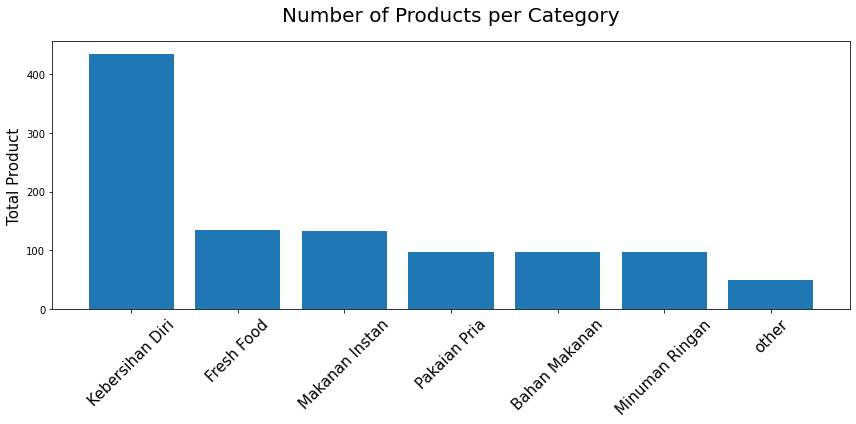

In [8]:
plt.figure(figsize=(12, 6))
plt.bar(sum_produk_per_kategori['top_category'], 
        sum_produk_per_kategori['product_id'])
plt.xticks(rotation=45, fontsize=15)
plt.title("Number of Products per Category", loc='center', fontsize=20, pad=20)
plt.ylabel("Number of Products", fontsize=15)
plt.tight_layout()
plt.savefig('images/total_product_category.png')
plt.show()

#### Sepuluh Produk dengan Base Price Termahal 

In [9]:
produk_termahal = product_df.sort_values('base_price', ascending=False, ignore_index=True).head(10)
produk_termahal

,product_id,desc_product,category,base_price
0,585,Blackmores Bio C 1000mg 150's,Vitamin,365000
1,719,Mom's Recipe Pudding Tart Square 24X24cm,Fresh Food,325000
2,590,Blackmores Glucosamine Sulfate 1500 90's,Vitamin,305000
3,596,Blackmores Pregnancy & Breast-Feeding Gold 120's,Vitamin,295000
4,718,Mom's Recipe Pudding Tart Square 22X22cm,Fresh Food,285000
5,132,EMBA LONG PANT FM316,Pakaian Pria,263000
6,594,Blackmores Odourless Fish Oil 1000 200's,Vitamin,263000
7,856,Mustika Ratu Hand & Body Spray Nourishng Olive...,Kebersihan Diri,245000
8,717,Mom's Recipe Pudding Tart Round 20cm,Fresh Food,230000
9,39,ANNA FAITH LEGGING STRIPE,Pakaian Wanita,225000


#### Sepuluh Produk dengan Base Price Termurah

In [10]:
produk_termurah = product_df.sort_values('base_price', ascending=True, ignore_index=True).head(10)
produk_termurah

,product_id,desc_product,category,base_price
0,333,Ajinomoto Mie Instant Yum Yum Tomyum Udang 70G,Makanan Instan,2000
1,317,Indomie Mie Instant Soto Padang 75G,Makanan Instan,2000
2,318,Indomie Mie Instant Soto Spesial 75G,Makanan Instan,2000
3,319,Sedaap Mie Instant Ayam Bawang Telur 77G,Makanan Instan,2000
4,327,3 Ayam Mie Telor Super Kuning 200G,Makanan Instan,2000
5,66,GAPURA BATIK CRAFT GELANG ETNIK GBC0076,Aksesoris Wanita,2000
6,332,Abc Mie Rebus Selera Pedas Gulai Ayam Pedas 70G,Makanan Instan,2000
7,346,Honig Macaroni Elbow 200G,Makanan Instan,2000
8,350,Indomie Mi Keriting Ayam Panggang 90G,Makanan Instan,2000
9,911,Citra Sabun Mandi Pencerah Kulit Pearl 70G,Kebersihan Diri,2000


### user Dataset

In [11]:
user_df.sample(5)

,user_id,nama_user,kodepos,email
7211,7212,Emong Kuswandari,74090,ademandala@perum.biz.id
7804,7805,"KH. Radit Nasyidah, S.E.I",49305,raisamanullang@perum.net
2391,2392,"Kasiran Yulianti, S.Pt",36154,putrimarpaung@yahoo.com
5848,5849,"Irsad Hutasoit, S.H.",88333,najmudinoskar@gmail.com
16633,16634,"Darimin Utami, S.Ked",57574,balijanhutagalung@ud.mil


Pada dataset ini terdapat 4 kolom yang terdiri dari:
* user_id : ID pengguna
* nama_user : nama pengguna
* kodepos : kodepos alamat utama dari pengguna
* email : email dari pengguna

In [12]:
print("Jumlah missing data tiap kolom:\n", user_df.isna().sum())
user_df.describe()

Jumlah missing data tiap kolom:
 user_id      0
nama_user    0
kodepos      0
email        0
dtype: int64


,user_id,kodepos
count,17936.00000,17936.000000
mean,8968.50000,49773.144179
std,5177.82155,28967.078621
min,1.00000,0.000000
25%,4484.75000,24606.000000
50%,8968.50000,49485.000000
75%,13452.25000,74868.500000
max,17936.00000,99997.000000


### order Dataset

In [13]:
order_df.sample(5)

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
32857,220668,12,10785,2644,1168000,0,1168000,2020-05-24,2020-05-27,2020-05-29
17010,113219,21,13920,12648,3300000,0,3300000,2020-01-09,2020-01-19,2020-01-29
38751,259906,39,7847,45764,13178000,0,13178000,2020-05-30,2020-06-01,2020-06-02
44066,295036,26,11763,95860,1827000,0,1827000,2019-05-14,2019-05-26,2019-05-28
5953,39611,57,8919,66990,1466000,0,1466000,2019-12-04,2019-12-09,2019-12-11


Pada dataset ini terdapat 10 kolom yang terdiri dari:
* order_id : ID transaksi
* seller_id : ID dari pengguna yang menjual
* buyer_id : ID dari pengguna yang membeli
* kodepos : kodepos alamat pengirimian transaksi (bisa beda dengan alamat utama)
* subtotal : total harga barang sebelum diskon
* discount : diskon dari transaksi
* total : total harga barang setelah dikurangi diskon, yang dibayarkan pembeli
* created_at : tanggal transaksi
* paid_at : tanggal dibayar
* delivery_at : tanggal pengiriman

In [14]:
print("Jumlah missing data tiap kolom:\n", order_df.isna().sum())
order_df.describe()

Jumlah missing data tiap kolom:
 order_id          0
seller_id         0
buyer_id          0
kodepos           0
subtotal          0
discount          0
total             0
created_at        0
paid_at        5046
delivery_at    9790
dtype: int64


,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total
count,74874.000000,74874.000000,74874.000000,74874.000000,7.487400e+04,7.487400e+04,7.487400e+04
mean,249966.290194,34.964808,8989.472941,50130.240805,2.006208e+06,1.621004e+04,1.988183e+06
std,144065.798238,19.907566,5169.815577,28899.309837,2.605957e+06,1.092113e+05,2.583434e+06
min,3.000000,1.000000,1.000000,0.000000,2.000000e+03,0.000000e+00,1.700000e+03
25%,124587.000000,18.000000,4524.000000,25131.000000,3.420000e+05,0.000000e+00,3.400000e+05
50%,250715.000000,35.000000,8994.000000,50002.000000,1.050000e+06,0.000000e+00,1.038000e+06
75%,374152.000000,52.000000,13477.000000,75258.000000,2.658000e+06,0.000000e+00,2.636000e+06
max,498783.000000,69.000000,17936.000000,99997.000000,3.611400e+07,4.602000e+06,3.611400e+07


Pada dataset ini terdapat nilai **NaN** pada kolom *paid_at* dan kolom *delivery_at*, nilai tersebut dapat dipahami sebagai transaksi yang tidak sempurna.

In [15]:
# Merubah format kolom yang berisi tanggal menjadi format datetime

order_df['created_at'] = pd.to_datetime(order_df['created_at'])
order_df['delivery_at'] = pd.to_datetime(order_df['delivery_at'])
order_df['paid_at'] = pd.to_datetime(order_df['paid_at'])
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74874 entries, 0 to 74873
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     74874 non-null  int64         
 1   seller_id    74874 non-null  int64         
 2   buyer_id     74874 non-null  int64         
 3   kodepos      74874 non-null  int64         
 4   subtotal     74874 non-null  int64         
 5   discount     74874 non-null  int64         
 6   total        74874 non-null  int64         
 7   created_at   74874 non-null  datetime64[ns]
 8   paid_at      69828 non-null  datetime64[ns]
 9   delivery_at  65084 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(7)
memory usage: 5.7 MB


#### Jumlah Transaksi per Bulan
Untuk memperoleh jumlah transaksi per bulan, dilakukan perubahan frekuensi data dari frekuensi harian (daily) menjadi frekuensi bulanan (monthly) dan menghitung jumlah order tiap bulan.

In [16]:
transaksi_bulanan = order_df.resample('M', on='created_at').order_id.count()
transaksi_bulanan.index = transaksi_bulanan.index.strftime('%Y-%m')
print('Jumlah transaksi per bulan: \n', transaksi_bulanan)

Jumlah transaksi per bulan: 
 created_at
2019-01      117
2019-02      354
2019-03      668
2019-04      984
2019-05     1462
2019-06     1913
2019-07     2667
2019-08     3274
2019-09     4327
2019-10     5577
2019-11     7162
2019-12    10131
2020-01     5062
2020-02     5872
2020-03     7323
2020-04     7955
2020-05    10026
Name: order_id, dtype: int64


In [17]:
transaksi_bulanan = transaksi_bulanan.reset_index()

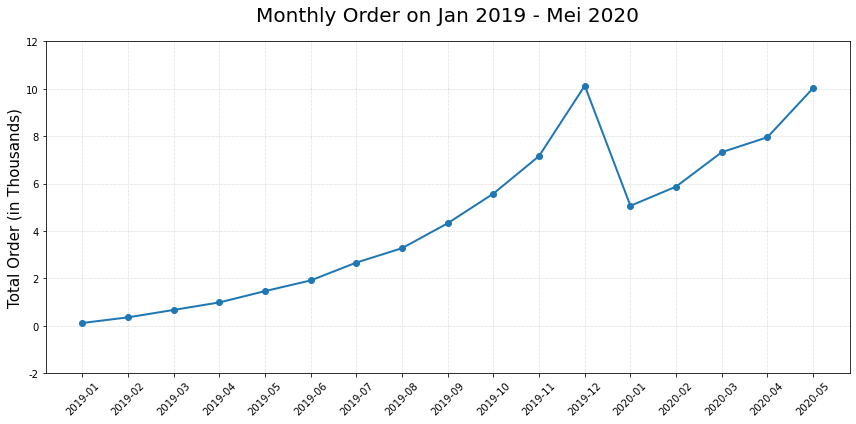

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(transaksi_bulanan['created_at'],
        transaksi_bulanan['order_id'],
        marker='o', linewidth=2)
plt.title('Monthly Order on Jan 2019 - Mei 2020', loc='center', pad=20, fontsize=20)
plt.ylabel('Total Order (in Thousands)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/monthly_order.png')
plt.show()

#### Status Transaksi
* Jumlah transaksi yang tidak dibayar

In [19]:
jumlah_tidak_bayar = order_df['paid_at'].isna().sum()
print("Jumlah transaksi yang tidak dibayar :", jumlah_tidak_bayar)

Jumlah transaksi yang tidak dibayar : 5046


* Jumlah transaksi yang tidak dikirim, baik yang sudah dibayar maupun belum dibayar

In [20]:
jumlah_tidak_kirim = order_df['delivery_at'].isna().sum()
print("Jumlah transaksi yang tidak dikirim :", jumlah_tidak_kirim)

Jumlah transaksi yang tidak dikirim : 9790


* Jumlah transaksi yang sudah dibayar tapi tidak dikirim

In [21]:
index_filter = order_df['paid_at'].notna() & order_df['delivery_at'].isna()
jumlah_bayar_tidak_kirim = order_df.loc[index_filter, 'order_id'].count()

print("Jumlah transaksi yang sudah dibayar tapi tidak dikirim :", jumlah_bayar_tidak_kirim)

Jumlah transaksi yang sudah dibayar tapi tidak dikirim : 4744


* Jumlah transaksi yang dikirim pada hari yang sama dengan tanggal bayar

In [22]:
index_filter = order_df['paid_at'] == order_df['delivery_at']
jumlah = order_df.loc[index_filter, 'order_id'].count()

print("Jumlah transaksi yang dikirim pada hari yang sama dengan tanggal bayar :", jumlah)

Jumlah transaksi yang dikirim pada hari yang sama dengan tanggal bayar : 4588


#### Status User
* Jumlah seluruh user

In [23]:
jumlah_user = user_df['user_id'].nunique()
print("Jumlah seluruh user: ", jumlah_user)

Jumlah seluruh user:  17936


* Jumlah user yang pernah bertransaksi sebagai buyer

In [24]:
jumlah_buyer = order_df['buyer_id'].nunique()
print("Jumlah user yang pernah bertransaksi sebagai buyer: ", jumlah_buyer)

Jumlah user yang pernah bertransaksi sebagai buyer:  17877


* Jumlah user yang pernah bertransaksi sebagai seller

In [25]:
jumlah_seller = order_df['seller_id'].nunique()
print("Jumlah user yang pernah bertransaksi sebagai seller: ", jumlah_seller)

Jumlah user yang pernah bertransaksi sebagai seller:  69


* Jumlah user yang pernah bertransaksi sebagai seller & buyyer

In [26]:
id_buyyer = order_df['buyer_id'].unique()
idx = order_df['seller_id'].isin(id_buyyer)
jumla_buyer_seller = order_df.loc[idx, 'seller_id'].nunique()
print("Jumlah user yang pernah bertransaksi sebagai seller & buyyer: ", jumla_buyer_seller)

Jumlah user yang pernah bertransaksi sebagai seller & buyyer:  69


* Jumlah user yang belum pernah bertransaksi

In [27]:
id_seller = order_df['seller_id'].unique()
id_buyyer_seller = np.append(id_buyyer, id_seller)
idx = ~user_df['user_id'].isin(id_buyyer_seller) 
jumlah_user_nonaktif = user_df.loc[idx, 'user_id'].nunique()
print("Jumlah user yang belum pernah bertransaksi: ", jumlah_user_nonaktif)

Jumlah user yang belum pernah bertransaksi:  59


### order_detail Dataset

In [28]:
order_detail_df.sample(5)

,order_detail_id,order_id,product_id,price,quantity
111445,1068801,298323,306,2000,16
40034,382524,106924,90,39000,7
121953,1169587,326283,707,44000,30
80155,770999,215129,267,6000,21
48753,465749,130209,696,50000,7


Pada dataset ini terdapat 5 kolom yang terdiri dari:
* order_detail_id : ID table ini
* order_id : ID dari transaksi
* product_id : ID dari masing-masing produk transaksi
* price : harga barang masing-masing produk
* quantity : jumlah barang yang dibeli dari masing-masing produk

In [29]:
print("Jumlah missing data tiap kolom:\n", order_detail_df.isna().sum())
order_detail_df.describe()

Jumlah missing data tiap kolom:
 order_detail_id    0
order_id           0
product_id         0
price              0
quantity           0
dtype: int64


,order_detail_id,order_id,product_id,price,quantity
count,1.874520e+05,187452.000000,187452.000000,187452.000000,187452.000000
mean,8.971103e+05,250250.740920,576.543729,37391.508226,21.472249
std,5.164502e+05,143957.840873,329.594746,45662.642083,12.113271
min,5.000000e+00,3.000000,1.000000,2000.000000,1.000000
25%,4.469048e+05,124963.000000,288.000000,8000.000000,11.000000
50%,8.995105e+05,250970.000000,581.000000,20000.000000,21.000000
75%,1.342075e+06,374239.750000,861.000000,48000.000000,32.000000
max,1.789270e+06,498783.000000,1145.000000,365000.000000,42.000000


#### Sepuluh Produk Terlaris
Untuk memperoleh 10 produk terlalris, dilakukan **grouping** berdasarkan *product_id* lalu dihitung jumlah *quantity* order.

In [30]:
produk_terlaris_df = order_detail_df.groupby('product_id').agg({
    'quantity' : 'sum'
})
produk_terlaris_df = produk_terlaris_df.sort_values('quantity', ascending=False)

id_produk_terlaris = np.array(produk_terlaris_df.index)

index_filter = product_df['product_id'].isin(id_produk_terlaris)
produk_terlaris = product_df.loc[index_filter, 'product_id':'category'].reset_index(drop=True)

produk_terlaris = produk_terlaris_df.join(produk_terlaris.set_index('product_id'))
produk_terlaris.head(10)

,quantity,desc_product,category
product_id,,,
983,6270,Vaseline Lotion Healthy White Uv Lightening 20...,Kebersihan Diri
166,6119,RIDER CELANA ACTIVE WEAR 3IN1 R315B,Pakaian Pria
805,5867,Big Soft Drink Strawberry 3.1L,Minuman Ringan
532,5849,Formula Pasta Gigi + Sikat Gigi Sparkling Whit...,Kebersihan Diri
41,5775,LEGGING WORLD JEGGING LW 11,Pakaian Wanita
162,5715,RIDER CELANA SUPER RIDER R321B,Pakaian Pria
529,5689,Fit-U-Mask Masker Anak 5'S,Kebersihan Diri
594,5674,Blackmores Odourless Fish Oil 1000 200's,Vitamin
868,5662,Ultra Hand Sanitizer Spray 100Ml,Kebersihan Diri


#### Produk yang Terjual per Kategori

In [31]:
sum_order_per_kategori = produk_terlaris
sum_order_per_kategori['top_category'] = sum_order_per_kategori['category'].apply(lambda x: x if (x in top_kategori['category'].to_list()) else 'other')
sum_order_per_kategori = produk_terlaris.groupby('top_category')['quantity'].sum().reset_index()
sum_order_per_kategori

,top_category,quantity
0,Bahan Makanan,358630
1,Fresh Food,481716
2,Kebersihan Diri,1529986
3,Makanan Instan,452330
4,Minuman Ringan,349591
5,Pakaian Pria,329232
6,other,523531


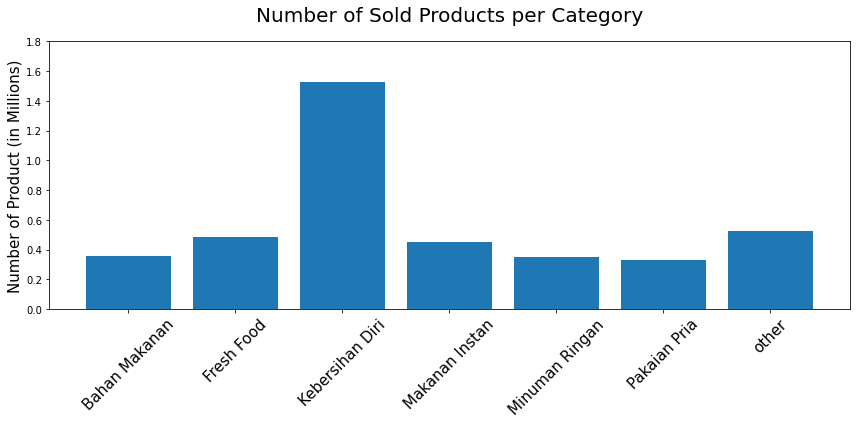

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(sum_order_per_kategori['top_category'], 
        sum_order_per_kategori['quantity'])
plt.xticks(rotation=45, fontsize=15)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(float))
plt.title("Number of Sold Products per Category", loc='center', fontsize=20, pad=20)
plt.ylabel("Number of Product (in Millions)", fontsize=15)
plt.tight_layout()
plt.savefig('images/order_amount_category.png')
plt.show()